In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
n=11                    # number of particles
m= np.ones(n)           # mass 
M=np.sum(m)
k=1
l=1
t= 100
h= 0.001               # timestep

N = int(t/h)
x = np.zeros((N,n,3))      #positions
p = np.zeros((N,n,3))      #momenta
f = np.zeros((N,n,3))      #forces
r = np.zeros(N)            # end-end distance
E = np.zeros((N))          # energy
potential = np.zeros((N))
kinetic = np.zeros((N))
rcm = np.zeros((N,3))      # center of mass
rg = np.zeros((N,3))       # radius of gyration

In [3]:
for i in range(n):
    x[0,i,0] = (i+1)*l      #generate the initial positions 

In [4]:
x[0,:,0] -= 0.5             #generate the initial positions

In [5]:
x[0,:]

array([[ 0.5,  0. ,  0. ],
       [ 1.5,  0. ,  0. ],
       [ 2.5,  0. ,  0. ],
       [ 3.5,  0. ,  0. ],
       [ 4.5,  0. ,  0. ],
       [ 5.5,  0. ,  0. ],
       [ 6.5,  0. ,  0. ],
       [ 7.5,  0. ,  0. ],
       [ 8.5,  0. ,  0. ],
       [ 9.5,  0. ,  0. ],
       [10.5,  0. ,  0. ]])

In [6]:
for i in range(n-1):               # calculate the center of mass at time 0
    rcm[0] += m[i]*x[0,i]
rcm[0] =rcm[0]/M
rcm

array([[4.54545455, 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       ...,
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ]])

In [8]:
p[0,5] = [-3/7,6/7,-2/7]          # initial momentum on the 6th particle

In [9]:
def integr(n,h,p):
    for i in range(N-1):
        
        
        
        for j in range(n):
            if j==0:      # checks if its the first bead
                
                f[i,j] = k*np.linalg.norm((x[i,j+1]-x[i,j])) 
                
            
            elif j==n-1:   # if its the last bead
                
                f[i,j] = - k*np.linalg.norm((x[i,j]-x[i,j-1]))
            
            else:
                f[i,j] = k*np.linalg.norm((x[i,j+1]-x[i,j]) - k*(x[i,j]-x[i,j-1]))
               
            
            x[i+1,j] = x[i,j] + p[i,j]*h + 0.5*f[i,j]*h**2  # updates positions of all beads
            
            
            if x[i+1,j,0] > 11:        # periodic boundary conditions for x dimension
                x[i+1,j,0] -= 11
            elif x[i+1,j,0] < 0:
                x[i+1,j,0] += 11
                
            if x[i+1,j,1] > 5.5:
                x[i+1,j,1] -= 11
            elif x[i+1,j,1] < -5.5:
                x[i+1,j,1] += 11
                
            if x[i+1,j,2] > 5.5:
                x[i+1,j,2] -= 11
            elif x[i+1,j,2] < -5.5:
                x[i+1,j,2] += 11
        
        
        
        
        for j in range(n-1):
            rcm[i+1] += m[j]*x[i+1,j]
        rcm[i+1] = rcm[i+1]/M
        
        #for j in range(n-1):
            
            #rg[i+1] +=  m[j]*(x[i+1,j]-rcm[i+1])**2
        #rg[i+1] = rg[i+1]/M
            
        for j in range(n):          #update forces
            
            if j==0:
                
                f[i+1,j] = k*np.linalg.norm((x[i+1,j+1]-x[i+1,j]))      
            
            elif j==n-1:
                
                f[i+1,j] = - k*np.linalg.norm((x[i+1,j]-x[i+1,j-1]))
            
            else:
                f[i+1,j] = k*np.linalg.norm((x[i+1,j+1]-x[i+1,j]) - k*(x[i+1,j]-x[i+1,j-1]))
        
            
            p[i+1,j] = p[i,j] + 0.5*(f[i,j]+f[i+1,j])*h  #updates momenta of all beads
        
        #r[i+1] = x[i+1,-1] - x[i+1,0] #end-end distance
        
        for j in range(n-1):
            
            potential[i+1] += 0.5*k*(np.linalg.norm(x[i+1,j+1]-x[i+1,j]))**2
        
        
        for j in range(n):    
            
            kinetic[i+1] += 0.5*np.linalg.norm(p[i+1,j])**2
            
        E[i+1] = potential[i+1] + kinetic[i+1]

In [10]:
integr(n,h,p)

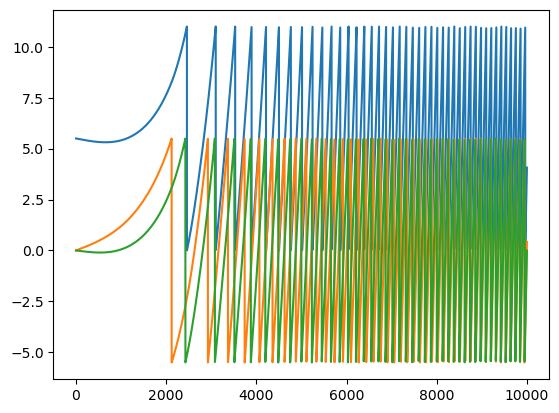

In [15]:
plt.plot(x[:10000,5,:])    #plot positions of particle 6

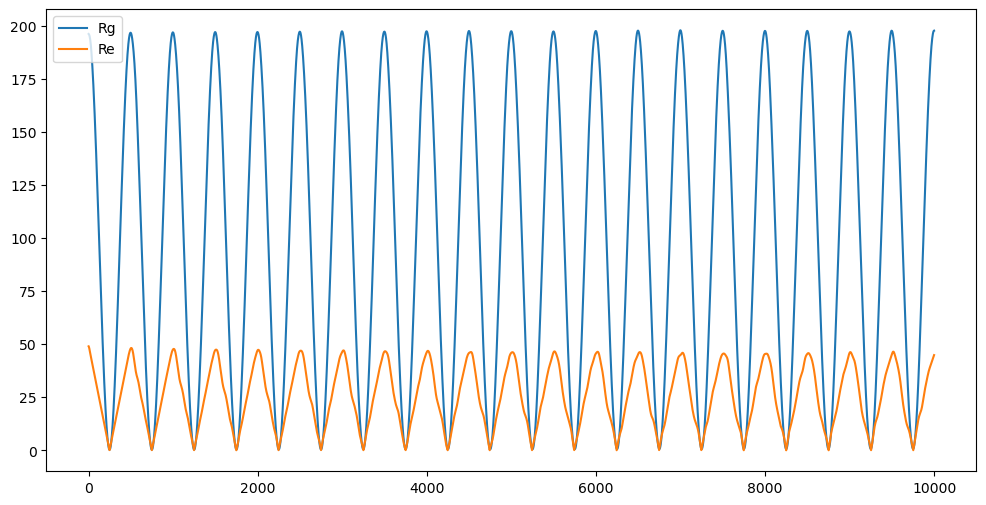

In [77]:
fig = plt.figure(figsize=(12,6))
plt.plot(rg[:10000],label= 'Rg')
plt.plot(r[:10000],label = 'Re')
plt.legend(loc='upper left')
plt.show()

Text(0.5, 1.0, 'Potential energy per particle')

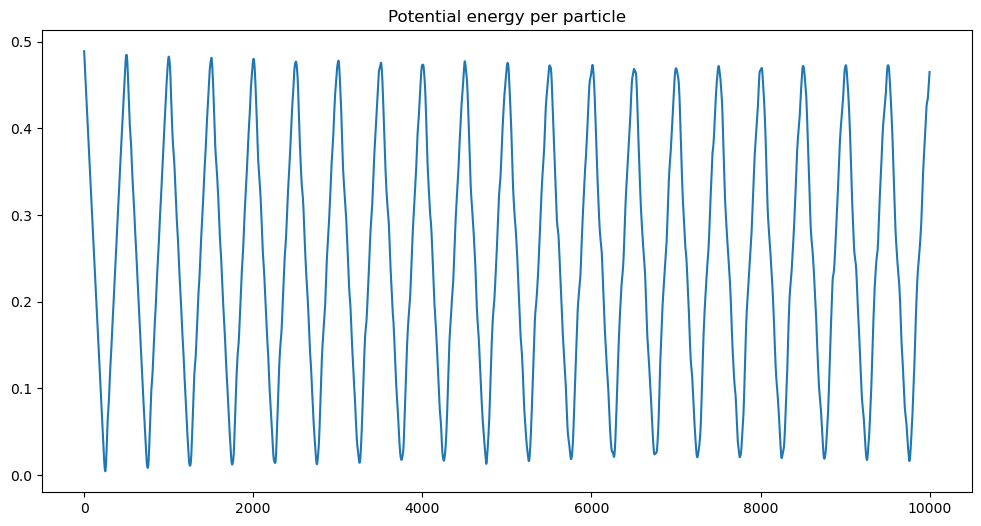

In [78]:
potentialp = potential/50
fig = plt.figure(figsize=(12,6))
plt.plot(potentialp[1:10000])
plt.title('Potential energy per particle')

In [79]:
print(np.average(r[998:]**2))
print(np.average(rg[998:]**2)) 
print(np.average(potentialp[998:]))

831.4950928087595
14791.869531005346
0.2456450519929533


Text(0.5, 1.0, 'positins for N=11, T=[0,300]t')

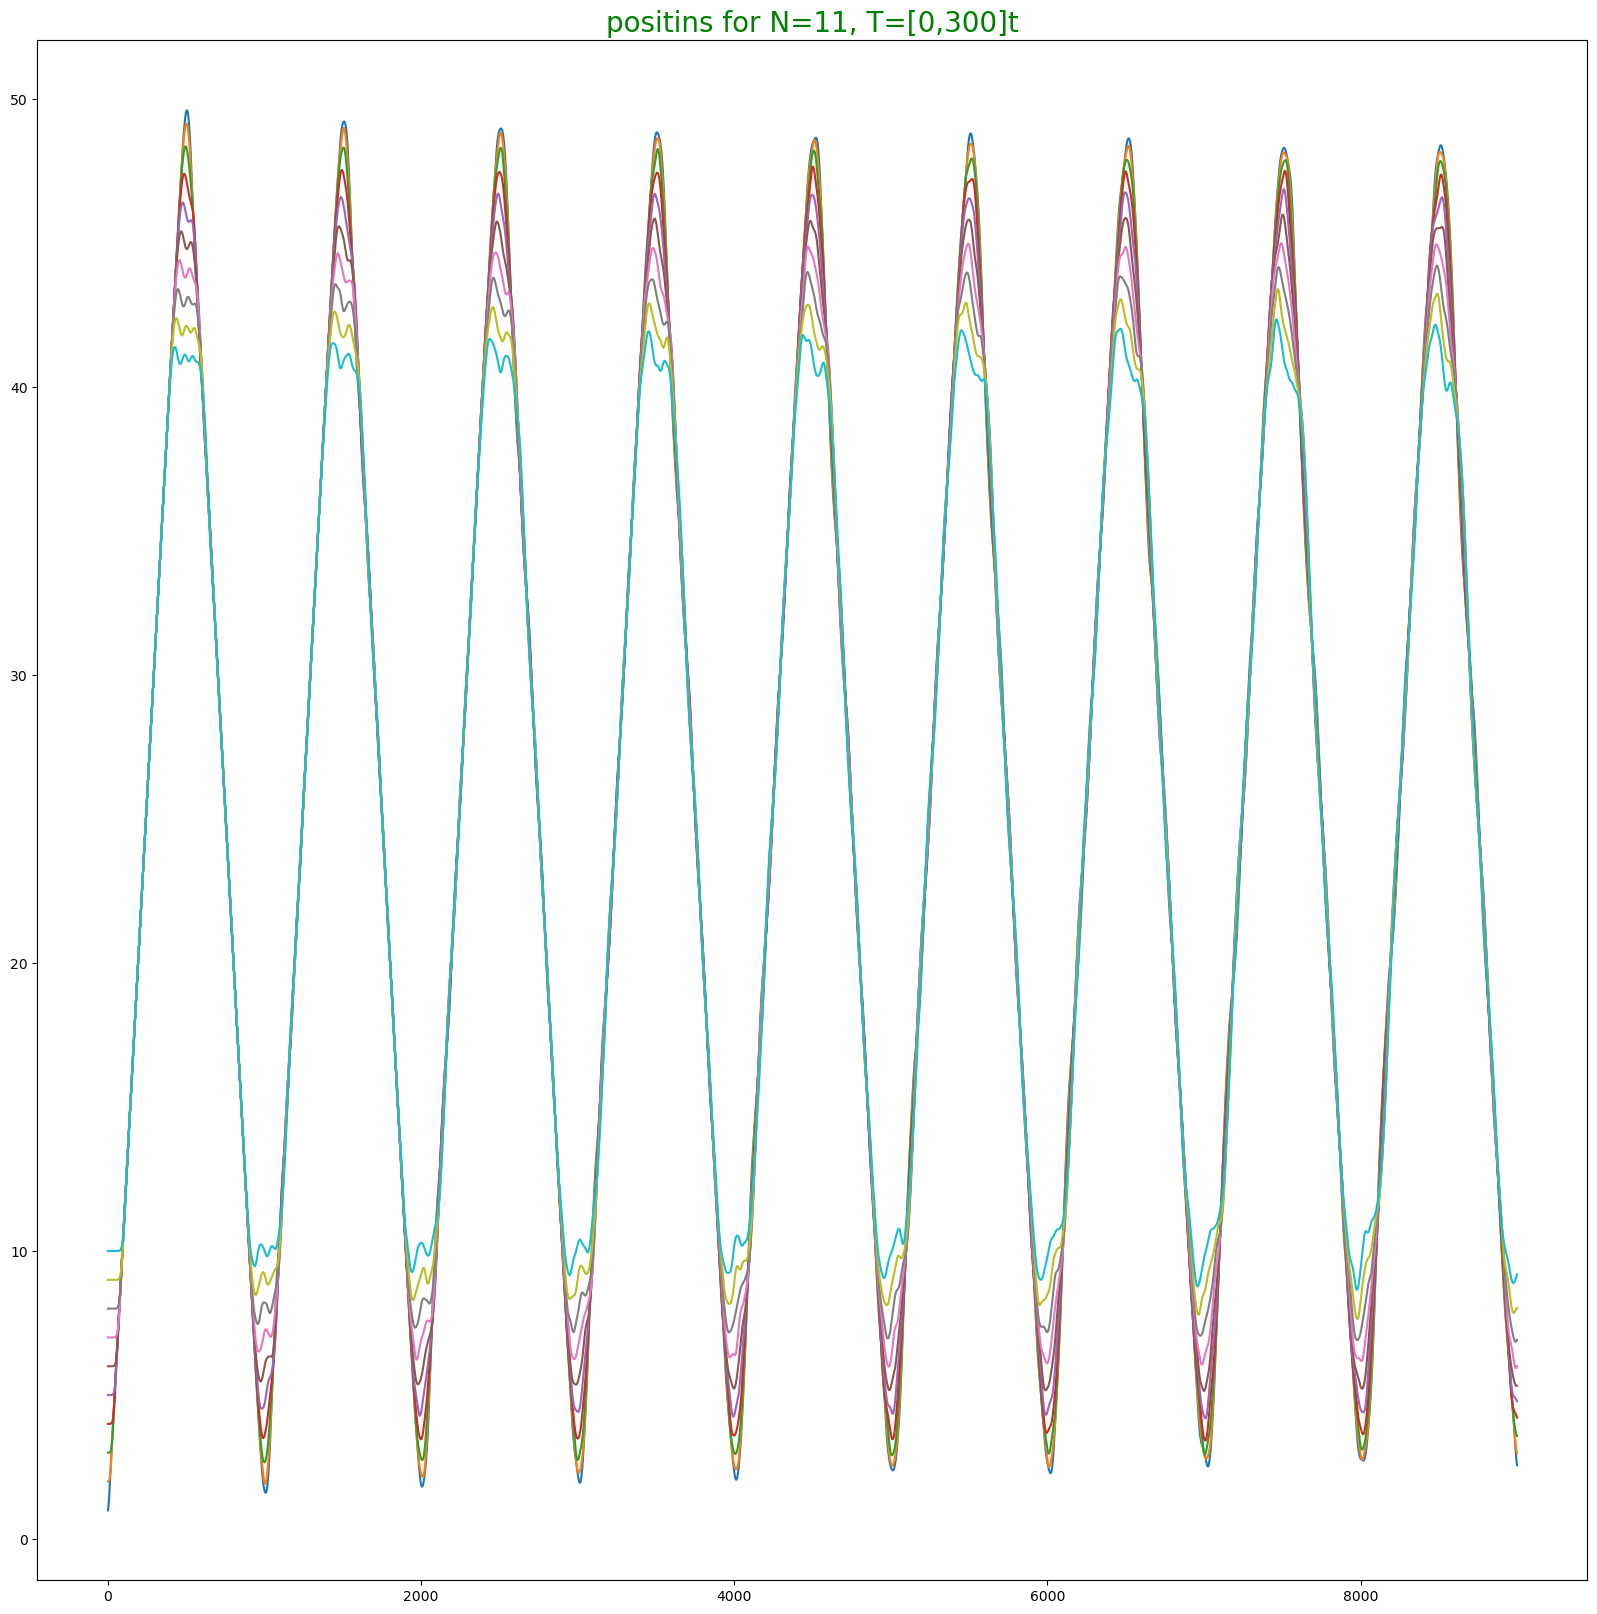

In [80]:
fig = plt.figure(figsize=(20,20))
fig = plt.plot(x[:9000,0:10])
plt.title(label="positins for N=11, T=[0,300]t",
          fontsize=20,
          color="green")

In [81]:
r = np.abs(r)
np.average(r)

24.998622591793357

Text(0.5, 1.0, 'end-to-end distance, Re')

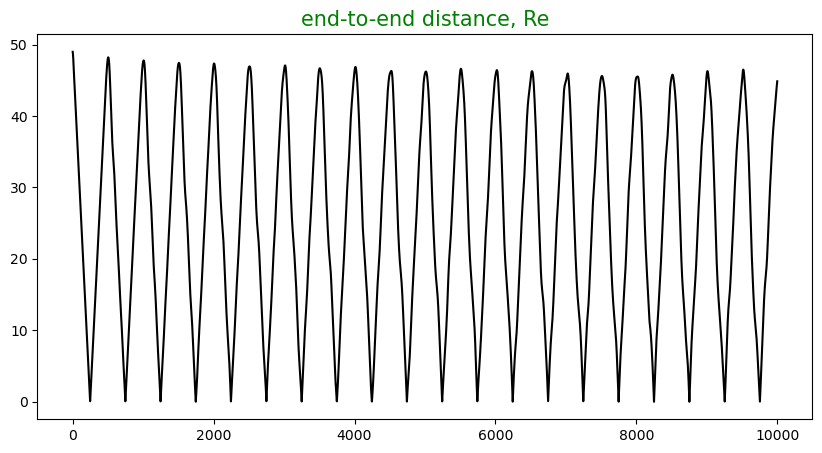

In [82]:
fig = plt.figure(figsize=(10,5))
fig = plt.plot(r,color="black")
plt.title(label="end-to-end distance, Re",fontsize=15,color="green")

In [151]:
r = np.abs(r)

In [71]:
c = np.random.normal(0,np.sqrt(m*k*l**2),3)

In [72]:
c

array([ 0.23588127,  0.97602588, -0.88521789])

In [229]:
p1 = np.zeros_like(p)
p1[0,0] = c[0]
p1[0,-1] = -c[0]
integr(n,h,p=p1)
Re1 = np.abs(r)

In [230]:
Re1 = np.abs(Re1)
np.average(Re1)

49.96691277186176

In [231]:
p2 = np.zeros_like(p)
p2[0,0] = c[1]
p2[0,-1] = -c[1]
integr(n,h,p=p2)
Re2 = np.abs(r)
np.average(Re2)

49.978751173161285

In [267]:
p3 = np.zeros_like(p)
p3[0,0] = c[2]
p3[0,-1] = -c[2]
integr(n,h,p=p3)
Re3 =np.abs(r)
np.average(Re3)

5.806344651382075

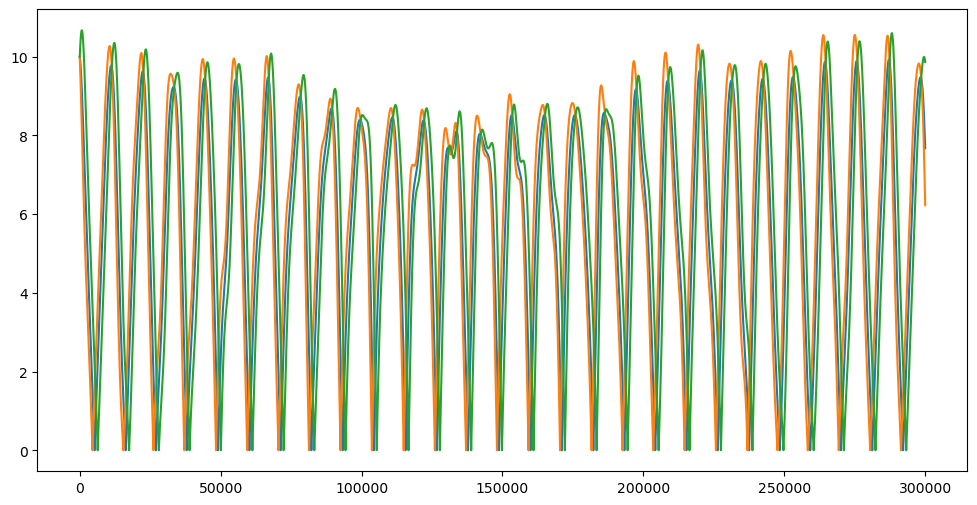

In [101]:
figure = plt.figure(figsize=(12,6))
plt.plot(Re1)
plt.plot(Re2)
plt.plot(Re3)

In [79]:
fig = plt.figure(figsize=(10,5))
plt.plot(R)
plt.title(label="end-to-end distance",fontsize=15,color="green")

NameError: name 'R' is not defined

<Figure size 1000x500 with 0 Axes>

In [ ]:
Re1

In [80]:
Re2

array([10.        ,  9.99804695,  9.9960919 , ...,  6.23452843,
        6.23116276,  6.22779606])

In [81]:
R = np.zeros((N,3))

In [82]:
R[:,0] = Re1
R[:,1] = Re2
R[:,2] = Re3

Text(0.5, 1.0, 'end-to-end distance for initial meomenta sampled from a gaussian distribution (N=11)')

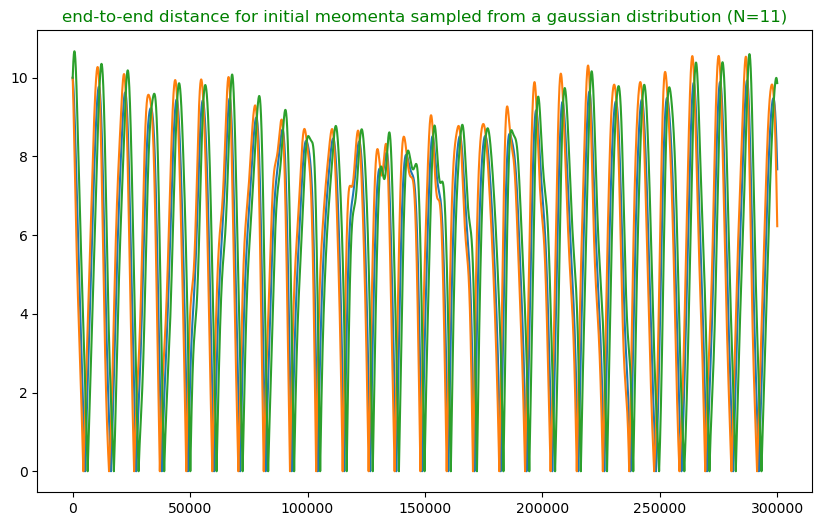

In [187]:
fig = plt.figure(figsize=(10,6))
plt.plot(R)
plt.title(label="end-to-end distance for initial meomenta sampled from a gaussian distribution (N=11)",color="green")

In [84]:
np.average(R[:,:],axis=0)

array([5.6311453 , 5.82990186, 5.80370754])

In [121]:
E[0] = 5.25

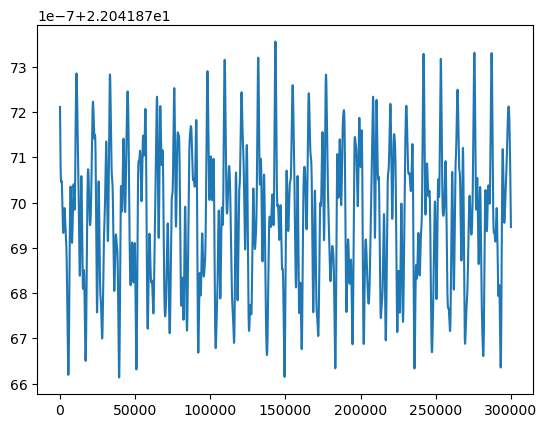

In [89]:
plt.plot(E[1:])

In [301]:
np.average(E[1:])

49.7490614730979

In [95]:
np.average(kinetic)

10.979740189219621

In [123]:
np.average(E)

5.249999906357654

In [122]:
E

array([5.25      , 5.25      , 5.25      , ..., 5.24999988, 5.24999988,
       5.24999988])

Text(0, 0.5, 'e')

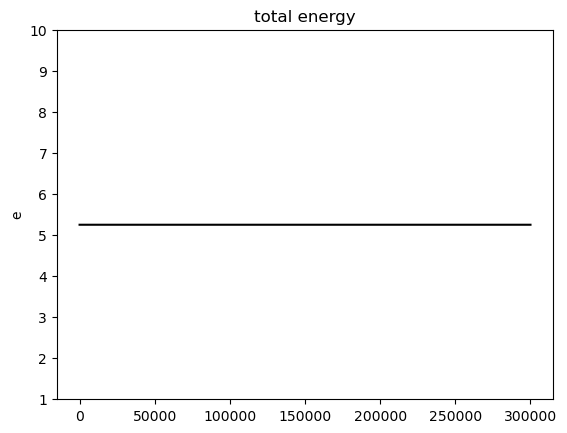

In [129]:
plt.plot(E, color ='black')
plt.ylim(1,10)
plt.title(label="total energy")
plt.ylabel('e')

In [131]:
np.average(kinetic)

2.615979996132763

In [133]:
np.average(r)

5.674146662570539

In [374]:
sd = [0.24504372234054894,0.2449946531663461,0.24567473924058641,0.24503839308900455,0.24499655657458405]
np.std(sd)

0.00026335492716876124

In [156]:
Rgn = [20.3735,
337.1571,
14802.9412,
247042.9545,
608365.0527,
1276152.0916,
2354231.0667,
4039463.7627
]

In [157]:
Rgn = np.log(Rgn)


In [158]:
Nn = [10,
20,
50,
100,
125,
150,
175,
200
]
Nn = np.log(Nn)

In [570]:
Rgn

array([ 2.8602046 ,  5.83625443,  9.60258117, 12.41787652, 13.32175411,
       14.05841882, 14.66947629, 15.20919008])

In [571]:
Nn

array([2.30258509, 2.99573227, 3.91202301, 4.60517019, 4.82831374,
       5.01063529, 5.16478597, 5.29831737])

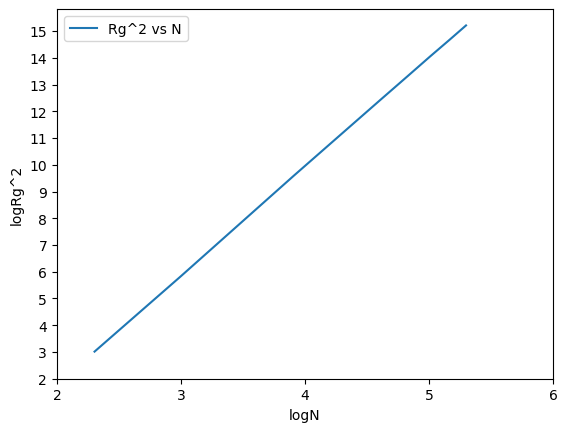

In [160]:
plt.plot(Nn,Rgn,label = 'Rg^2 vs N')
plt.xticks(range(2,7))
plt.yticks(range(2,16))
plt.xlabel('logN')

plt.ylabel('logRg^2')
plt.legend()

In [579]:
coefficients = np.polyfit(Rgn, Nn, 1)